# 美しい地図を作りましょう

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/better maps.jpg">

matplotlib を使用してマップを作成する方法を学習しました。 このラボでは、マップ フィーチャの変更、ベースマップの追加、タイトルの作成などにより、これらのマップをさらに磨き上げる方法を学びます。

*注意

matplotlib には日本語フォント表示に関する問題があります。 Mac と PC のどちらを使用しているかに応じて、以下の適切なフォント ファミリを設定してください。

In [3]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

## Get data

まずはe-Statのサイトにアクセス。そこから次に手順でデータをダウンロードして今週のフォルダーに入れる：

➡️ https://www.e-stat.go.jp/

➡️ 地図

➡️ 統計データダウンロード

➡️ 境界データ

➡️ 小地域

➡️ 国勢調査

➡️ 2020年

➡️ 小地域（基本単位区）（JGD2000）

➡️ 世界測地系緯度経度・Shapefile

➡️ 12 千葉県

➡️ 12217 柏市

In [4]:
gdf = gpd.read_file('B002005212020DDSWC42201.zip')

In [5]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   9366 non-null   object  
 1   PREF       9366 non-null   object  
 2   CITY       9366 non-null   object  
 3   K_AREA     9366 non-null   object  
 4   S_AREA     9366 non-null   object  
 5   PREF_NAME  9366 non-null   object  
 6   CITY_NAME  9366 non-null   object  
 7   S_NAME     9361 non-null   object  
 8   KIGO_E     38 non-null     object  
 9   HCODE      9366 non-null   int64   
 10  AREA       9366 non-null   float64 
 11  PERIMETER  9366 non-null   float64 
 12  KIHON1     9366 non-null   object  
 13  DUMMY1     9366 non-null   object  
 14  KIHON2     9366 non-null   object  
 15  KIHON3     9366 non-null   object  
 16  C1         9366 non-null   int64   
 17  C2         9366 non-null   int64   
 18  DUMMY2     9366 non-null   object  
 19  C3         9366 non

In [6]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,4220100000,42,201,000000000,00000,長崎県,長崎市,None,None,8101,...,2010000-0-00,0,0,None,None,129.794182,32.659019,0000-00000,0-0,"POLYGON ((129.79397 32.65885, 129.79383 32.658..."
1,4220100000,42,201,000000000,00000,長崎県,長崎市,None,None,8101,...,2010000-0-00,0,0,None,None,129.792313,32.659282,0000-00000,0-0,"POLYGON ((129.79239 32.65905, 129.79207 32.659..."
2,4220100000,42,201,000000000,00000,長崎県,長崎市,None,None,8101,...,2010000-0-00,0,0,None,None,129.793455,32.659110,0000-00000,0-0,"POLYGON ((129.79361 32.65894, 129.79333 32.659..."
3,4220100000,42,201,000000000,00000,長崎県,長崎市,None,None,8101,...,2010000-0-00,0,0,None,None,129.782108,32.711814,0000-00000,0-0,"POLYGON ((129.78222 32.71157, 129.78179 32.711..."
4,4220100000,42,201,000000000,00000,長崎県,長崎市,None,None,8101,...,2010000-0-00,0,0,None,None,129.657370,32.860321,0000-00000,0-0,"POLYGON ((129.65716 32.86004, 129.65704 32.860..."


このデータを「丁目」でまとめたいのでテーブルの中の丁目を示す「S_NAME」でグループ化してsumします。

In [7]:
# dissolve by S_NAME and sum fields 
gdf = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

ではとりあえずシンプルにマップを`fig,ax`という変数を使って作ろう。このアプローチはmatplotlibでよく使われ、複数のマップを同時に作りたい時に後々役に立ちます。今のうちに覚えておくと良い！

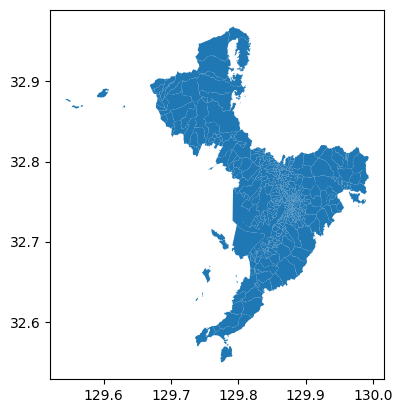

In [8]:
fig,ax = plt.subplots()
gdf.plot(ax=ax);

データには既に「JINKO」のカラムがあるので、これを使ってコロプレス（choropleth）マップを作ろう。
- `column='JINKO'`
- `legend=True`

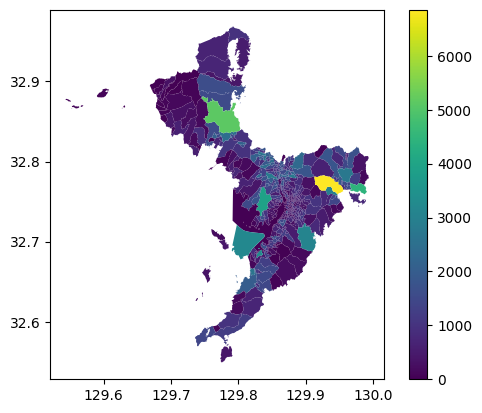

In [9]:
# population map
fig,ax = plt.subplots()
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

## Size

マップのサイズを変更
- `figsize=(10,10)`

2 つの数字はマップの幅と高さを示しますが、マップされるデータの形状に応じてサイズが変化する可能性があります。

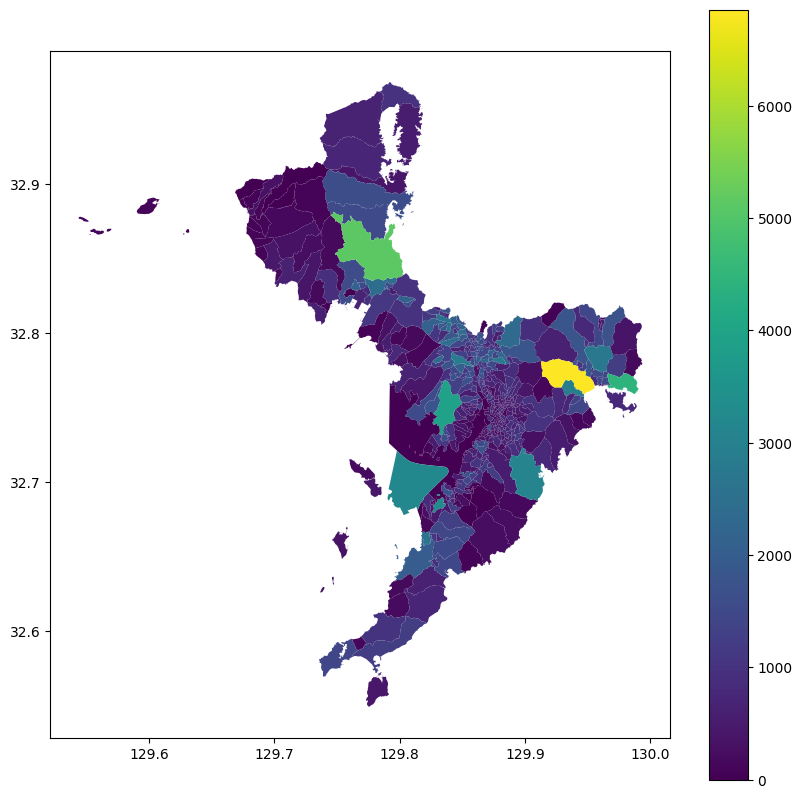

In [10]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_002.webp">
<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_003.webp">
<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_004.webp">

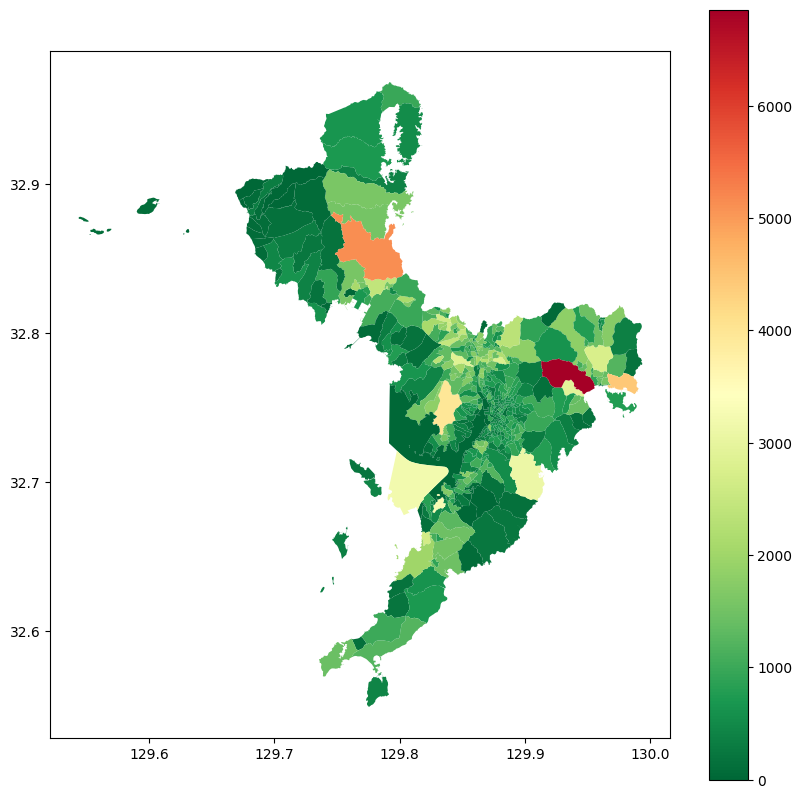

In [11]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='RdYlGn_r');

## Lines

次の引数を使用して、ポリゴンの境界線の幅と色を変更できます。

- `edgecolor='black'`
- `linewidth=0.1`

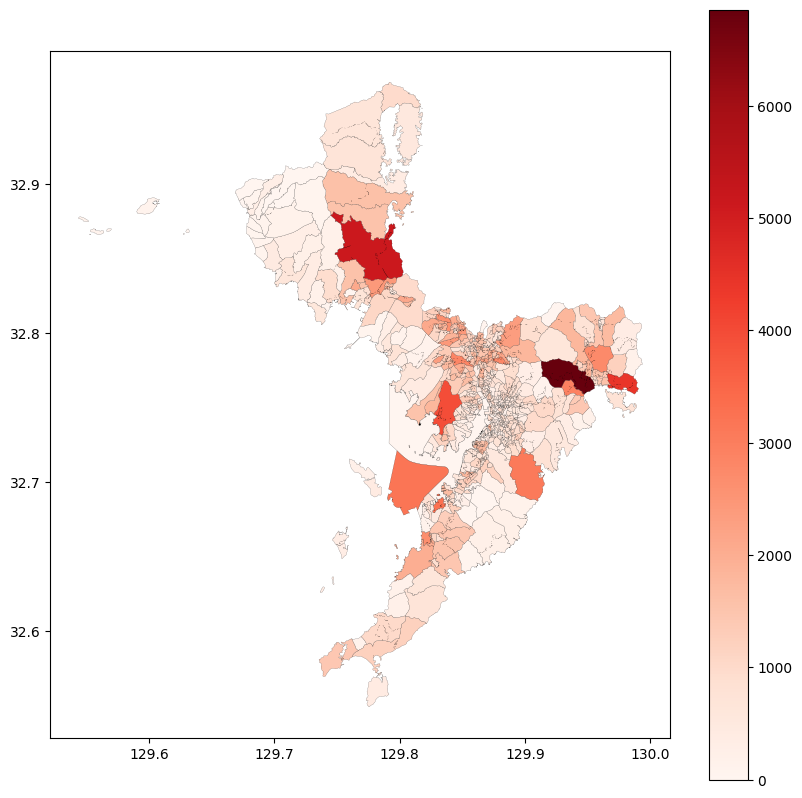

In [12]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1);

## Hide Axes

軸を非表示にするには、コード内に新しい行を作成し、`ax` 変数にアクセスする必要があります。

- `ax.axis('off')`


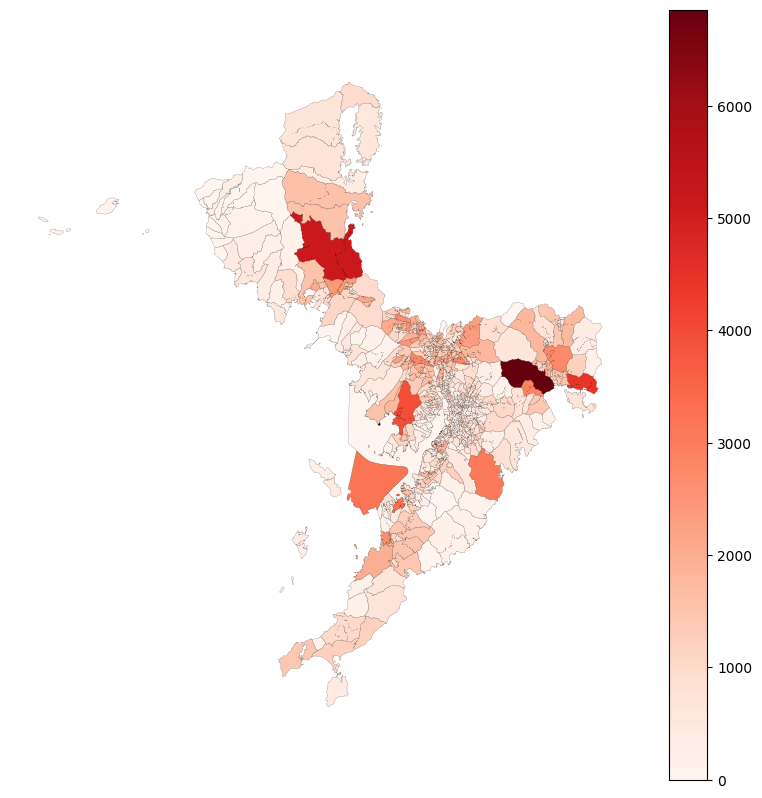

In [13]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1);

# hide axes
ax.axis('off');

## Legend options

凡例、デカくない？ラベルは？下にできない？と思ったら、オプションを足してみよう！

- `legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}`


/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/

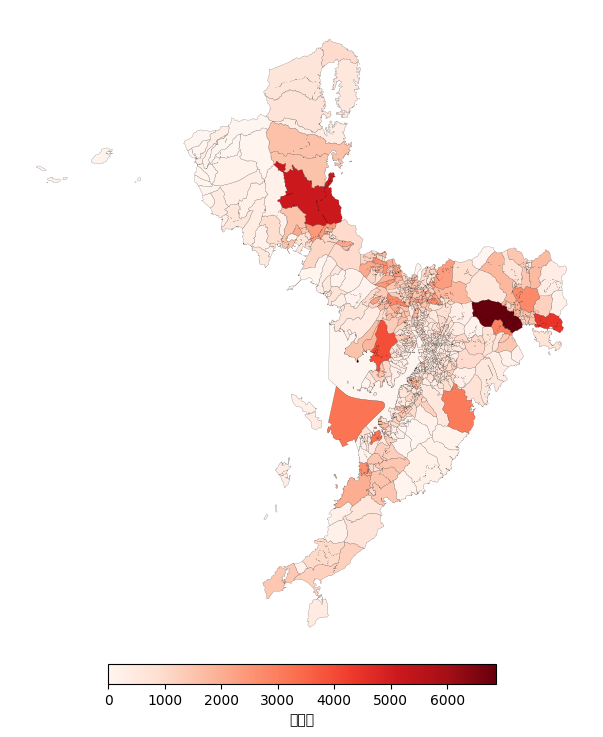

In [14]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off');

## Title

マップのタイトルを設定するには、`ax` 変数を参照する別のコード行を追加する必要があります。

なお、日本語フォントの設定する必要があるのでMACかPCによって違うので注意：

Windows PC:
- `ax.set_title('柏市の人口',fontsize=24, fontname='MS Gothic');`

Mac:
- `ax.set_title('柏市の人口',fontsize=24, fontname='Hiragino Maru Gothic Pro');`

/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26575 (\N{CJK UNIFIED IDEOGRAPH-67CF}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/

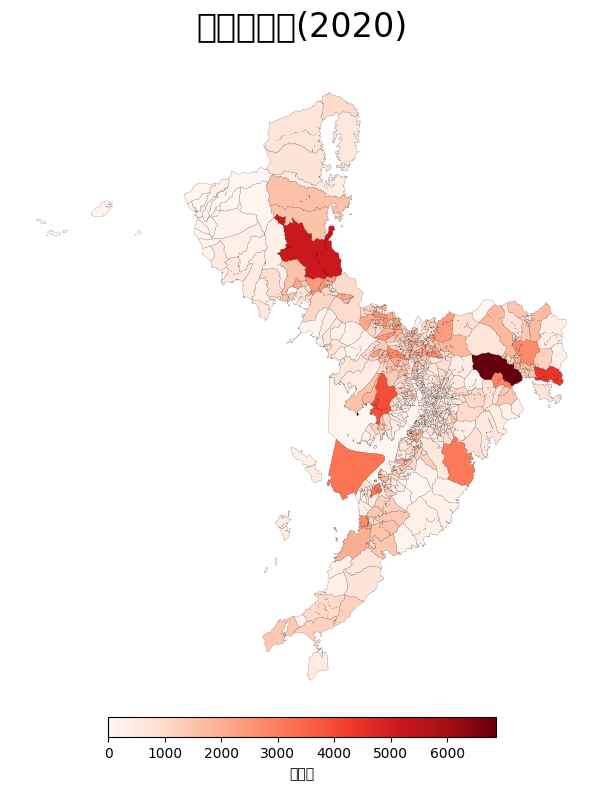

In [15]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20);

## Basemap

ベースマップを足すには複数のステップが必要となる。

まずはベースマップを提供しているモジュール【contextily】をimportする。

In [16]:
import contextily as cx

次はデータをcontextilyがサポートしている地図投影法に変換する必要がある。

え？地図投影法とは？

## Projections

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/projections.png">

https://www.esrij.com/gis-guide/coordinate-and-spatial/coordinate-system/


https://ja.wikipedia.org/wiki/%E5%9C%B0%E5%9B%B3%E6%8A%95%E5%BD%B1%E6%B3%95%E3%81%AE%E4%B8%80%E8%A6%A7

緯度経度 (latitude,longitude) で表されているデータの地理座標系のcrs番号は `4326`だがcontextilyのベースマップは【Web メルカトル】という投影座標系を使っていて、その crs番号は `3857` である。

In [17]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

## Basemap options

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/basemaps.jpg">

- source='https://cyberjapandata.gsi.go.jp/xyz/std/{z}/{x}/{y}.png'
- source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg'
- source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png'
- source='https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png'


/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26575 (\N{CJK UNIFIED IDEOGRAPH-67CF}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/

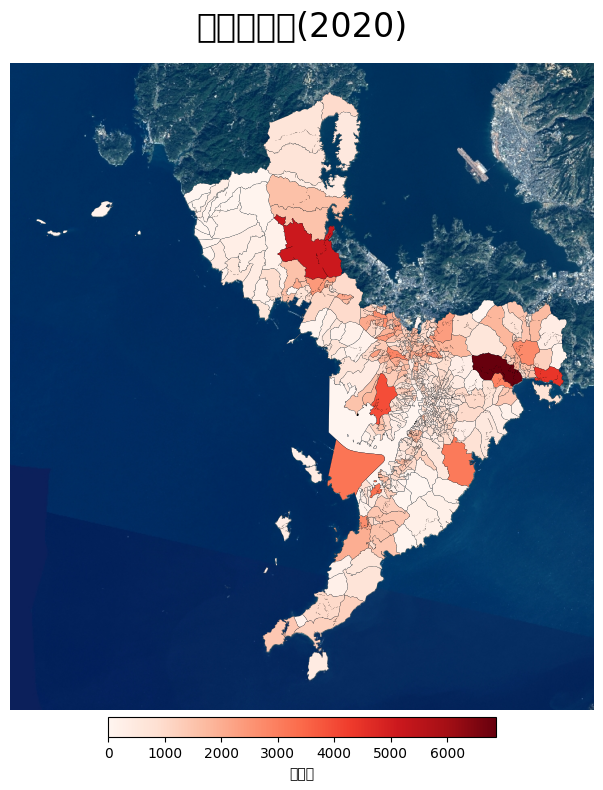

In [18]:
# population map
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');

## Transparency

コロプレス レイヤーに少し透明度を追加して、ベースマップ上にシームレスに「浮かせる」ことができます。

- `alpha=0.8`

/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26575 (\N{CJK UNIFIED IDEOGRAPH-67CF}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/

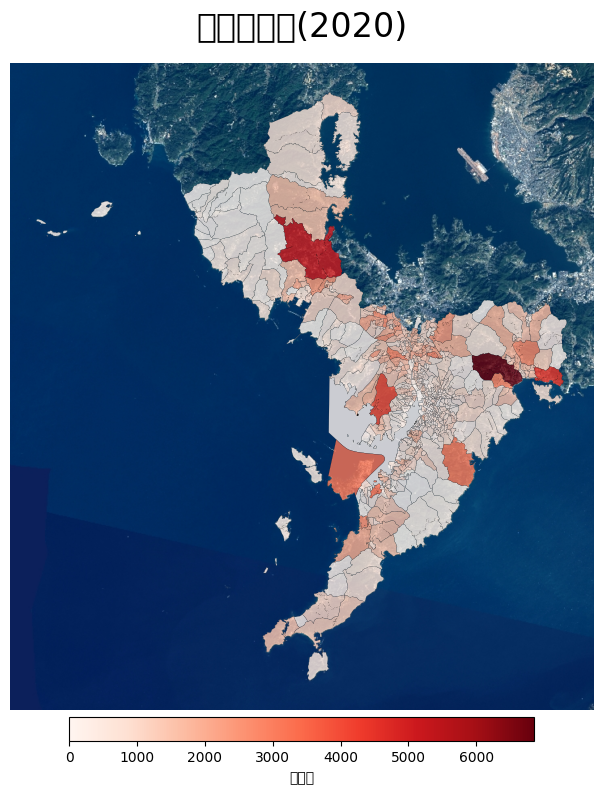

In [19]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


## Labels

ちょっと高度なテクニックだが、以下のようにトップ１０人口が高い場所のラベルをつける。

/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/geopandas/plotting.py:967: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.draw()
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30331 (\N{CJK UNIFIED IDEOGRAPH-767B}) missing from current font.
  func(*args, **kwargs)
/Users/mifuyu/miniconda3/envs/gis/lib/

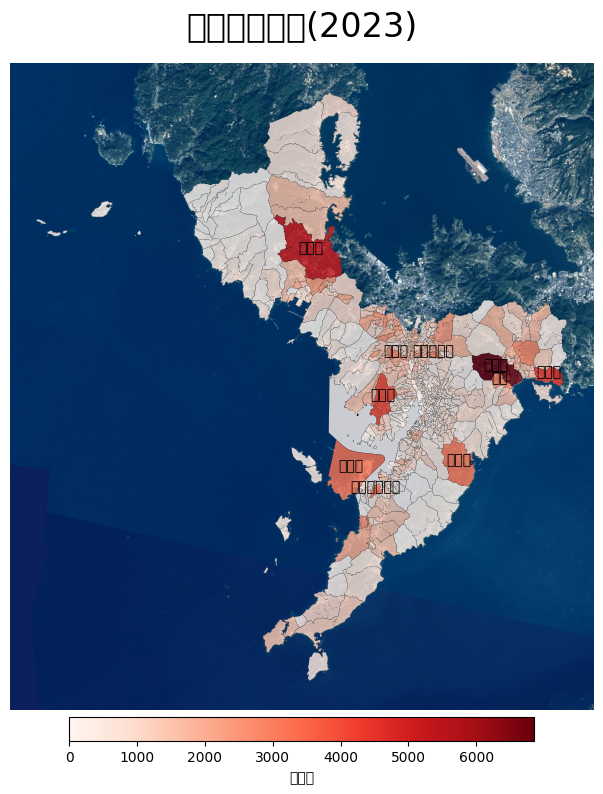

In [21]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('JINKO', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(10)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('能登町の人口(2023)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


# Exercise

「SETAI」を示す地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。